![hexagram30 small logo](https://avatars3.githubusercontent.com/u/37125516?s=100&v=4)

# Rate of Growth, Try 2

## Setup

Preperatory steps for using Maxima in Jupyter:

In [1]:
set_plot_option([svg_file, "./maxplot.svg"])$
load(draw)$

## Simple Logistics Equation

We'll use the same constants and equation as we defined for the growth equation in the previous notebook ("Try 1"):

In [2]:
K: 200;
P_0: 150;
t_n: (60*60*24*365.25);
r: 1/t_n;
growth_eqn: (K/(1 + (K - P_0)/P_0 * %e^(-r*t)));

(%o3)                                 200

(%o4)                                 150

(%o5)                             3.15576e+7

(%o6)                        3.168808781402895e-8

                                     200
(%o7)                   ------------------------------
                          - 3.168808781402895e-8 t
                        %e
                        -------------------------- + 1
                                    3

## Oscillating Part

However, for the oscillation part of the equation, we'll make some changes:

$$\frac{K}{\alpha}\sin \left(2\,\pi\,r\,t\right)$$

where $\alpha$ is the fraction of $K$ to use as the amplitude for the oscillations.

In [3]:
alpha: 50;
osc_eqn: K/alpha*sin(2*%pi*r*t);

(%o8)                                 50

(%o9)                  4 sin(6.33761756280579e-8 %pi t)

This gives us something that more resembles annual growth cycles (note that for the 20-year span below, there are 20 maxima/minima pairs):

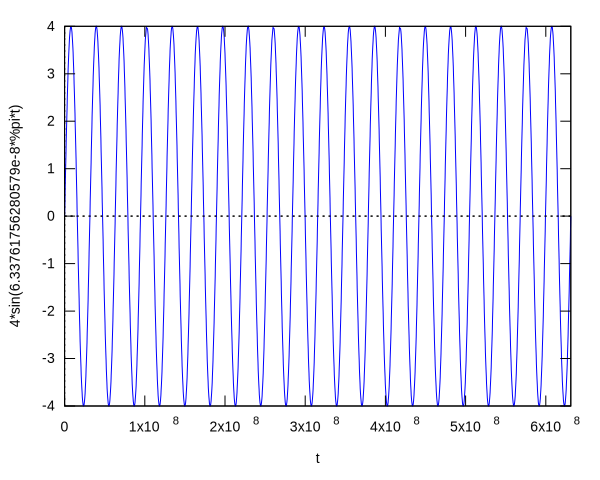

In [4]:
plot2d(osc_eqn, [t, 0, 20*t_n])$

## Dampening Part

We'd also like to simulate an initial surge in growth that fades over time, stabilizing to simple periodic cycles. To do this, we'll use a dampening function:

$$\frac{K}{\omega}\,e^ {-\frac{rt}{4}}\sin \left(
 2 \pi r t\right)$$

where $\omega$ is the fraction of $K$ to overshoot (contributing to the amplitude) in the first dampening cycle.

In [5]:
omega: 4;
damp_eqn: %e^(-r*t/omega)*K/4*sin(2*%pi*r*t);

(%o11)                                 4

              - 7.922021953507237e-9 t
(%o12)   50 %e                         sin(6.33761756280579e-8 %pi t)

Again, we use values that give us year-based cycles of increase and decline:

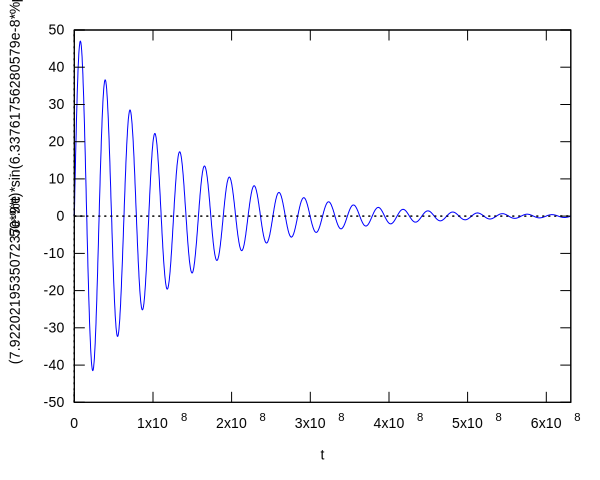

In [6]:
plot2d(damp_eqn, [t, 0, 20*t_n])$

## Combined Eqation

Bringing these all together, we get the following population model for our second try:

$$P(t)=K\,\left(\frac{1}{1 + \frac{K - P_0}{P_0}e^{-r\,t}} + \frac{\sin \left(2\,\pi\,r\,t\right)}{50}+ \frac{e^ {-\frac{r\,t}{4}}}{4}\,\sin \left(2\,\pi\,r\,t\right)\right)$$

In [7]:
eqn: growth_eqn + osc_eqn + damp_eqn;

            - 7.922021953507237e-9 t
(%o14) 50 %e                         sin(6.33761756280579e-8 %pi t)
                                                              200
            + 4 sin(6.33761756280579e-8 %pi t) + ------------------------------
                                                   - 3.168808781402895e-8 t
                                                 %e
                                                 -------------------------- + 1
                                                             3

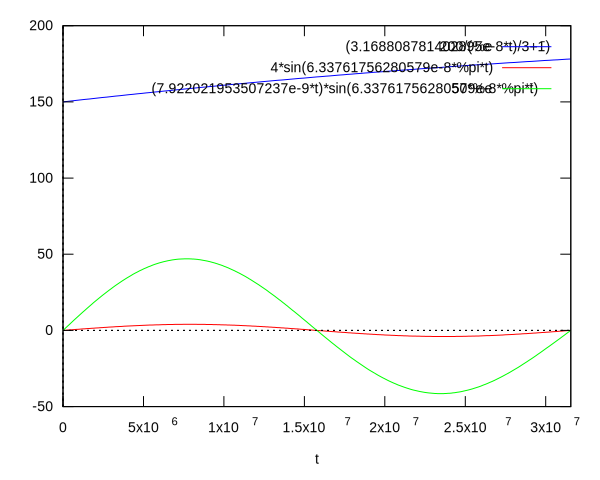

In [8]:
plot2d([growth_eqn,osc_eqn,damp_eqn], [t, 0, t_n])$

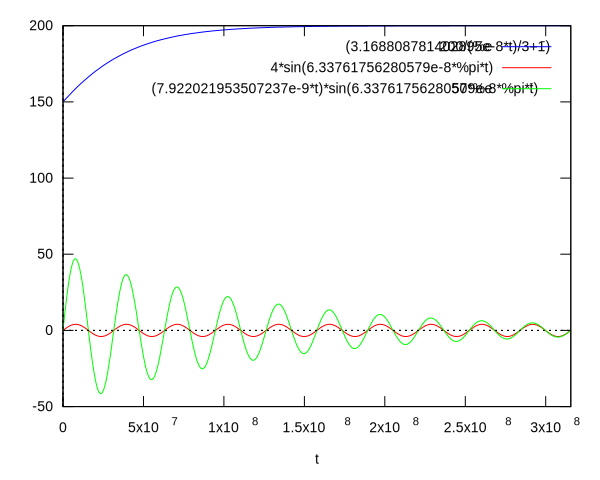

In [9]:
plot2d([growth_eqn,osc_eqn,damp_eqn], [t, 0, 10*t_n])$

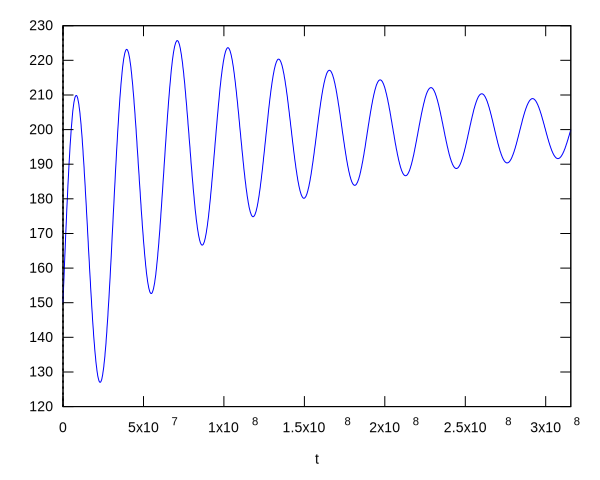

In [10]:
plot2d([eqn], [t, 0, 10*t_n])$

## Combined Variants

(%o18)                                50

(%o19)                                 2

(%o20)                 4 sin(6.33761756280579e-8 %pi t)

               - 6.33761756280579e-8 t
(%o21)   100 %e                        sin(6.33761756280579e-8 %pi t)

             - 6.33761756280579e-8 t
(%o22) 100 %e                        sin(6.33761756280579e-8 %pi t)
                                                              200
            + 4 sin(6.33761756280579e-8 %pi t) + ------------------------------
                                                   - 3.168808781402895e-8 t
                                                 %e
                                                 -------------------------- + 1
                                                             3

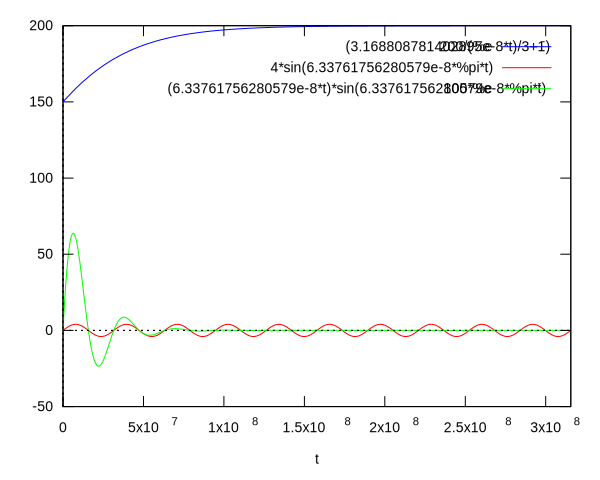

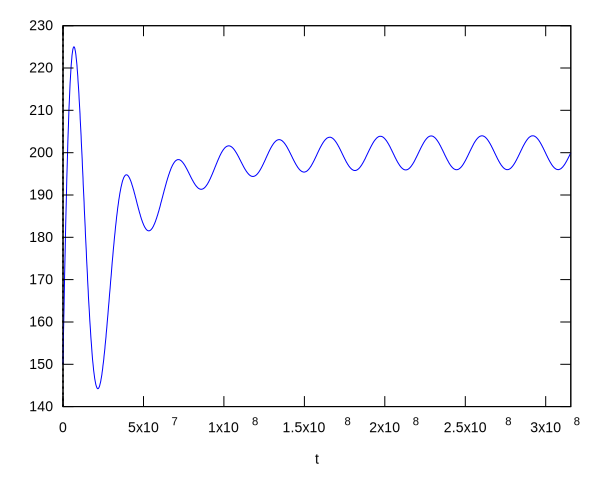

In [11]:
alpha: 50;
omega: 2;
osc_eqn: K/alpha*sin(2*%pi*r*t);
damp_eqn: %e^(-r*t*omega)* K/omega*sin(2*%pi*r*t);
eqn: growth_eqn + osc_eqn + damp_eqn;
plot2d([growth_eqn,osc_eqn,damp_eqn], [t, 0, 10*t_n])$
plot2d([eqn], [t, 0, 10*t_n])$